In [ ]:
from afmformats.formats.fmt_jpk import load_jpk
import afmformats
file_path = 'AFM images roughness/AFM images roughness/Cholecalciferol-2019.06.26-12.24.05.311.jpk-qi-image'
data = afmformats.load_data(file_path)

ValueError: Unsupported file extension: 'AFM images roughness\AFM images roughness\Cholecalciferol-2019.06.26-12.24.05.311.jpk-qi-image'!

In [5]:
import pyfmreader
from pyfmreader.uff import UFF

# UFF는 input 받지 않는 class
uff_obj = UFF()
file_path = "AFM images roughness/AFM images roughness/Cholecalciferol-2019.06.26-12.24.05.311.jpk-qi-image"
qi_data = pyfmreader.loadJPKfile(file_path, uff_obj, "jpk-qi-image")

BadZipFile: File is not a zip file

In [ ]:
import zipfile

# zip file이 아니라 뜬다.  binary 형식인지 파악하기
file_path = "AFM images roughness/AFM images roughness/Cholecalciferol-2019.06.26-12.24.05.311.jpk-qi-image"
zipfile.is_zipfile(file_path)

False

In [16]:
with open(file_path, "rb") as f:
    data = f.read(5)
    print(data)

b'MM\x00*\x00'


In [31]:
from PIL import Image
img = Image.open(file_path)
print(img.format, img.size, img.mode)

TIFF (64, 64) P


In [23]:
# img.mode==P ->(8-bit pixels, mapped to any other mode using a color palette)
# 출처 : https://pillow.readthedocs.io/en/stable/handbook/concepts.html

import cv2
open_with_cv2 = cv2.imread(file_path,cv2.IMREAD_ANYDEPTH)
print(open_with_cv2.shape,open_with_cv2.dtype)

(64, 64) uint8


In [24]:
import numpy as np
img = Image.open(file_path)
open_with_pil = np.array(img)
print(open_with_pil.shape, open_with_pil.dtype)

(64, 64) uint8


In [ ]:
# 둘이 다르다.
open_with_cv2 == open_with_pil

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
open_cv2_unchanged = cv2.imread(file_path,cv2.IMREAD_UNCHANGED)
print(open_cv2_unchanged.shape,open_cv2_unchanged.dtype)

(64, 64, 3) uint8


In [ ]:
converted_img = img.convert('RGB')

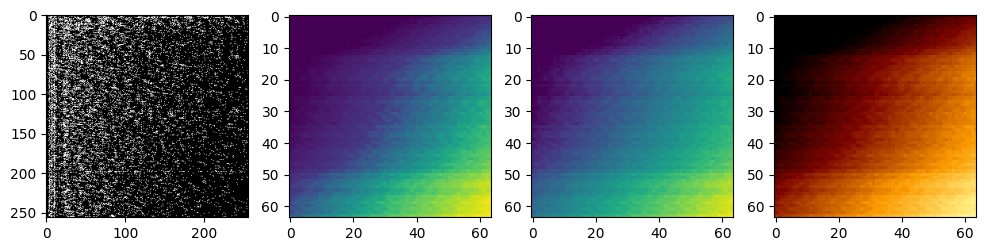

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,4,figsize = (12,3))
ax[0].imshow(img)
ax[1].imshow(open_with_cv2)
ax[2].imshow(open_with_pil)
ax[3].imshow(converted_img)

In [45]:
# 주어진 폴더 내에 jpk-qu-image만 불러오기
import glob
folder_path = "AFM images roughness/AFM images roughness/"
file_pattern = folder_path + "Cholecalciferol-*.jpk-qi-image"
image_files = glob.glob(file_pattern)
image_files

['AFM images roughness/AFM images roughness\\Cholecalciferol-2019.06.26-12.24.05.311.jpk-qi-image',
 'AFM images roughness/AFM images roughness\\Cholecalciferol-2019.06.26-12.39.19.020.jpk-qi-image',
 'AFM images roughness/AFM images roughness\\Cholecalciferol-2019.06.26-12.49.18.752.jpk-qi-image',
 'AFM images roughness/AFM images roughness\\Cholecalciferol-2019.06.26-13.38.48.864.jpk-qi-image',
 'AFM images roughness/AFM images roughness\\Cholecalciferol-2019.06.26-14.02.30.932.jpk-qi-image',
 'AFM images roughness/AFM images roughness\\Cholecalciferol-2019.06.26-14.12.44.535.jpk-qi-image']

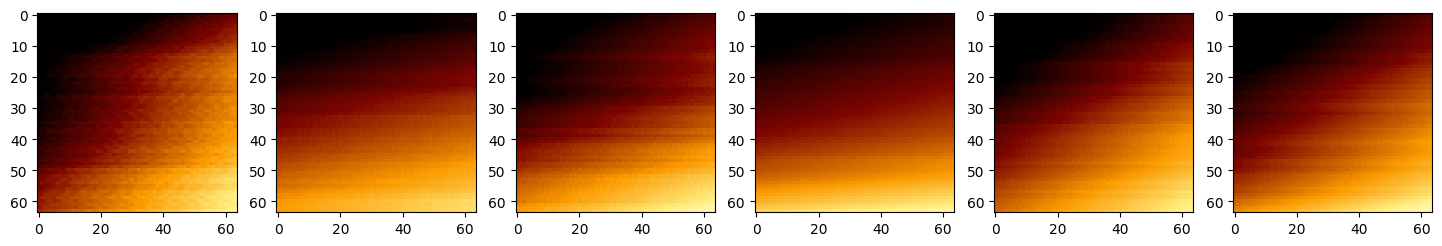

In [47]:
from PIL import Image

fig, ax = plt.subplots(1,len(image_files),figsize = (3*len(image_files),3))
for idx,img in enumerate(image_files):
    i = Image.open(img)
    i = i.convert('RGB')
    ax[idx].imshow(i)

In [49]:
import pyfmreader

# 파일 경로
file_path = "AFM Data/BARLKD1PERP/BARLKD1-1-data-HS-CAL-Extend-YM/LKD1-1-data-2018.07.19-10.37.27.631_processed-2019.01.25-13.56.28.jpk-proc-force"

# UFF 객체 생성
uff = pyfmreader.uff.UFF()

# JPK 파일 로드
jpk_data = pyfmreader.loadJPKfile(file_path, uff, "jpk-proc-force")

KeyError: "There is no item named 'shared-data/header.properties' in the archive"

In [ ]:
# 이러한 형식이어야만 열린다. 'shared-data/header.properties' 원래 이러한 형식으로 데이터가 저장되는지 모르겠다.
import zipfile
f = zipfile.ZipFile(file_path)
f.namelist()

['header.properties']

In [57]:
# 다른 방법으로 열어보기
import jpkfile
file = jpkfile.JPKFile(file_path)
file.segments

{}

In [ ]:
# module example 보면 다른 결과가 나오는데 원래 이러한 데이터인지 파악을 못하겠다.
file.get_info('segments')

'======================================================================\nSEGMENT\tTYPE\tNUM POINTS\tDURATION\n-------\t----\t----------\t--------\n======================================================================\n'